In [97]:
import pandas as pd

# Load each dataset
dow_jones_df = pd.read_csv('dow_jones.csv')
nasdaq_df = pd.read_csv('nasdaq.csv')
sp_500_df = pd.read_csv('s&p_500.csv')

# Display the first few rows of each dataframe to understand their structure
dow_jones_df.head(), nasdaq_df.head(), sp_500_df.head()

(         Date       Open       High        Low      Close
 0  12/31/2018  23,153.94  23,333.18  23,118.30  23,327.46
 1  12/28/2018  23,213.61  23,381.88  22,981.33  23,062.40
 2  12/27/2018  22,629.06  23,138.89  22,267.42  23,138.82
 3  12/26/2018  21,857.73  22,878.92  21,712.53  22,878.45
 4  12/24/2018  22,317.28  22,339.87  21,792.20  21,792.20,
          Date  Close/Last      Open      High       Low
 0  04/12/2024    16175.09  16293.03  16341.45  16125.33
 1  04/11/2024    16442.20  16236.20  16464.60  16154.65
 2  04/10/2024    16170.36  16104.01  16200.10  16092.02
 3  04/09/2024    16306.64  16328.76  16348.18  16141.15
 4  04/08/2024    16253.96  16285.18  16323.60  16220.72,
          Date      Open      High       Low     Close
 0  12/31/2019  3,215.18  3,231.72  3,212.03  3,230.78
 1  12/30/2019  3,240.09  3,240.92  3,216.57  3,221.29
 2  12/27/2019  3,247.23  3,247.93  3,234.37  3,240.02
 3  12/26/2019  3,227.20  3,240.08  3,227.20  3,239.91
 4  12/24/2019  3,225.45  3

In [98]:
# Rename 'Close/Last' in nasdaq_df to 'Close' for consistency
nasdaq_df.rename(columns={'Close/Last': 'Close'}, inplace=True)

In [99]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Helper function to clean and prepare DataFrame
def prepare_data(df):
    # Check and clean 'Date' column if it exists and is not the index
    if 'Date' in df.columns:
        # Filter out rows that may contain header-like strings or invalid dates
        valid_dates_df = df[df['Date'].str.match(r'\d{2}/\d{2}/\d{4}') == True].copy()
        # Convert 'Date' to datetime using a flexible parsing
        valid_dates_df['Date'] = pd.to_datetime(valid_dates_df['Date'], errors='coerce')
        # Drop any rows where 'Date' could not be converted
        valid_dates_df.dropna(subset=['Date'], inplace=True)
        valid_dates_df.set_index('Date', inplace=True)
        df = valid_dates_df

    # Handle 'Close' column type conversion
    if df['Close'].dtype == object:
        df['Close'] = df['Close'].str.replace(',', '').astype(float)
    else:
        df['Close'] = df['Close'].astype(float)

    df.sort_index(ascending=True, inplace=True)
    return df

# Assume dataframes are loaded
sp_500_df = prepare_data(sp_500_df)
dow_jones_df = prepare_data(dow_jones_df)
nasdaq_df = prepare_data(nasdaq_df)

# Define training and testing sets
def define_train_test_sets(df, offset_years=1):
    train_end_date = df.index.max() - pd.DateOffset(years=offset_years)
    train_df = df.loc[:train_end_date]
    test_df = df.loc[train_end_date + pd.DateOffset(days=1):]
    return train_df, test_df

sp_train_df, sp_test_df = define_train_test_sets(sp_500_df)
dow_jones_train_df, dow_jones_test_df = define_train_test_sets(dow_jones_df)
nasdaq_train_df, nasdaq_test_df = define_train_test_sets(nasdaq_df)

# Display last and first few rows of the train and test sets
sp_train_df.tail(), sp_test_df.head(), dow_jones_train_df.tail(), dow_jones_test_df.head(), nasdaq_train_df.tail(), nasdaq_test_df.head()


(                Open      High       Low    Close
 Date                                             
 2022-12-22  3,853.26  3,853.26  3,764.49  3822.39
 2022-12-23  3,813.11  3,845.80  3,797.01  3844.82
 2022-12-27  3,843.34  3,846.65  3,813.22  3829.25
 2022-12-28  3,829.56  3,848.32  3,780.78  3783.22
 2022-12-29  3,805.45  3,858.19  3,805.45  3849.28,
                 Open      High       Low    Close
 Date                                             
 2022-12-30  3,828.85  3,839.85  3,800.34  3839.50
 2023-01-03  3,853.29  3,878.46  3,794.33  3824.14
 2023-01-03  3,853.29  3,878.46  3,794.33  3824.14
 2023-01-04  3,840.36  3,873.16  3,815.77  3852.97
 2023-01-05  3,839.74  3,839.74  3,802.42  3808.10,
                  Open       High        Low     Close
 Date                                                 
 2021-12-29  36,421.14  36,571.55  36,396.19  36488.63
 2021-12-30  36,522.48  36,679.44  36,372.13  36398.08
 2021-12-31  36,385.85  36,484.94  36,303.97  36338.30
 2022-01-

In [100]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Helper function to clean and prepare DataFrame
def prepare_data(df):
    # Make a copy of the DataFrame to avoid SettingWithCopyWarning
    df = df.copy()

    # Check and clean 'Date' column if it exists and is not the index
    if 'Date' in df.columns:
        # Filter out rows that may contain header-like strings or invalid dates
        df = df[df['Date'].str.match(r'\d{2}/\d{2}/\d{4}') == True].copy()
        # Convert 'Date' to datetime using a flexible parsing
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        # Drop any rows where 'Date' could not be converted
        df.dropna(subset=['Date'], inplace=True)
        df.set_index('Date', inplace=True)

    # Handle 'Close' column type conversion
    if df['Close'].dtype == object:
        df.loc[:, 'Close'] = df['Close'].str.replace(',', '').astype(float)
    else:
        df.loc[:, 'Close'] = df['Close'].astype(float)

    df.sort_index(ascending=True, inplace=True)
    return df

# Assume dataframes are loaded
sp_500_df = prepare_data(sp_500_df)
dow_jones_df = prepare_data(dow_jones_df)
nasdaq_df = prepare_data(nasdaq_df)

# Define training and testing sets
def define_train_test_sets(df, offset_years=1):
    train_end_date = df.index.max() - pd.DateOffset(years=offset_years)
    train_df = df.loc[:train_end_date]
    test_df = df.loc[train_end_date + pd.DateOffset(days=1):]
    return train_df, test_df

sp_train_df, sp_test_df = define_train_test_sets(sp_500_df)
dow_jones_train_df, dow_jones_test_df = define_train_test_sets(dow_jones_df)
nasdaq_train_df, nasdaq_test_df = define_train_test_sets(nasdaq_df)

# Display last and first few rows of the train and test sets
sp_train_df.tail(), sp_test_df.head(), dow_jones_train_df.tail(), dow_jones_test_df.head(), nasdaq_train_df.tail(), nasdaq_test_df.head()


(                Open      High       Low    Close
 Date                                             
 2022-12-22  3,853.26  3,853.26  3,764.49  3822.39
 2022-12-23  3,813.11  3,845.80  3,797.01  3844.82
 2022-12-27  3,843.34  3,846.65  3,813.22  3829.25
 2022-12-28  3,829.56  3,848.32  3,780.78  3783.22
 2022-12-29  3,805.45  3,858.19  3,805.45  3849.28,
                 Open      High       Low    Close
 Date                                             
 2022-12-30  3,828.85  3,839.85  3,800.34  3839.50
 2023-01-03  3,853.29  3,878.46  3,794.33  3824.14
 2023-01-03  3,853.29  3,878.46  3,794.33  3824.14
 2023-01-04  3,840.36  3,873.16  3,815.77  3852.97
 2023-01-05  3,839.74  3,839.74  3,802.42  3808.10,
                  Open       High        Low     Close
 Date                                                 
 2021-12-29  36,421.14  36,571.55  36,396.19  36488.63
 2021-12-30  36,522.48  36,679.44  36,372.13  36398.08
 2021-12-31  36,385.85  36,484.94  36,303.97  36338.30
 2022-01-

In [101]:
def adf_test(timeseries):
    result = adfuller(timeseries.dropna(), autolag='AIC')  # Drop NA values and perform ADF test
    output = {
        'Test Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Number of Observations Used': result[3],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%']
    }
    return output

# Perform ADF test on each closing price column
adf_results_dow = adf_test(sp_train_df['Close'])
adf_results_nasdaq = adf_test(dow_jones_train_df['Close'])
adf_results_sp = adf_test(nasdaq_train_df['Close'])

adf_results_dow, adf_results_nasdaq, adf_results_sp

({'Test Statistic': -1.712468156257691,
  'p-value': 0.4247002274144712,
  'Lags Used': 9,
  'Number of Observations Used': 998,
  'Critical Value (1%)': -3.4369193380671,
  'Critical Value (5%)': -2.864440383452517,
  'Critical Value (10%)': -2.56831430323573},
 {'Test Statistic': -0.5552573269507413,
  'p-value': 0.8807749843419931,
  'Lags Used': 9,
  'Number of Observations Used': 1000,
  'Critical Value (1%)': -3.4369061654329998,
  'Critical Value (5%)': -2.86443457404,
  'Critical Value (10%)': -2.568311209},
 {'Test Statistic': -1.5893144494219877,
  'p-value': 0.4889589815245261,
  'Lags Used': 11,
  'Number of Observations Used': 994,
  'Critical Value (1%)': -3.43694584277544,
  'Critical Value (5%)': -2.8644520725172873,
  'Critical Value (10%)': -2.5683205291305176})

*   DOW JONES: The p-value is above 0.05, indicating that we cannot reject the null hypothesis. This suggests that the Dow Jones closing price series is not stationary.
*   NASDAQ: The p-value is significantly above 0.05, indicating that the Nasdaq closing price series is not stationary.
*   S&P: The p-value is above 0.05, indicating that the S&P 500 closing price series is not stationary.



In [102]:
# Apply first differencing to each closing price series
dow_jones_df['Close_DOW_diff'] = dow_jones_df['Close'].diff()
nasdaq_df['Close_NASDAQ_diff'] = nasdaq_df['Close'].diff()
sp_500_df['Close_SP_diff'] = sp_500_df['Close'].diff()

# Perform ADF test on the differenced series
adf_results_dow_diff = adf_test(dow_jones_df['Close_DOW_diff'])
adf_results_nasdaq_diff = adf_test(nasdaq_df['Close_NASDAQ_diff'])
adf_results_sp_diff = adf_test(sp_500_df['Close_SP_diff'])

adf_results_dow_diff, adf_results_nasdaq_diff, adf_results_sp_diff

({'Test Statistic': -10.95962142815611,
  'p-value': 8.390423084995925e-20,
  'Lags Used': 9,
  'Number of Observations Used': 1250,
  'Critical Value (1%)': -3.435592223709696,
  'Critical Value (5%)': -2.8638549702604803,
  'Critical Value (10%)': -2.56800251776},
 {'Test Statistic': -11.18994992039338,
  'p-value': 2.382628106207581e-20,
  'Lags Used': 8,
  'Number of Observations Used': 1248,
  'Critical Value (1%)': -3.4356006420838963,
  'Critical Value (5%)': -2.8638586845641063,
  'Critical Value (10%)': -2.5680044958343604},
 {'Test Statistic': -10.77841754533678,
  'p-value': 2.2880230456303077e-19,
  'Lags Used': 9,
  'Number of Observations Used': 1249,
  'Critical Value (1%)': -3.4355964295197743,
  'Critical Value (5%)': -2.863856825923603,
  'Critical Value (10%)': -2.5680035060041626})



*   Dow Jones (Close_DOW_diff): The p-value is extremely low, indicating strong evidence against the null hypothesis. We can conclude that the differenced Dow Jones series is stationary.
*   Nasdaq (Close_NASDAQ_diff): The p-value is extremely low. This indicates that the Nasdaq series, after differencing, is stationary.
*   S&P 500 (Close_SP_diff): The p-value is very low, indicating that the differenced S&P 500 series is stationary.






The date range for both datasets is from April 1, 2019, to April 14, 2024. We'll use data from April 1, 2019, to March 31, 2023, for training, and data from April 1, 2023, to April 14, 2024, for testing.

Using Nasdaq to predict S&P500

In [103]:
!pip install pyinform

In [104]:
from pyinform.transferentropy import transfer_entropy

pd.options.mode.chained_assignment = None
sp_train_df = sp_train_df[~sp_train_df.index.duplicated(keep='first')]
nasdaq_train_df = nasdaq_train_df[~nasdaq_train_df.index.duplicated(keep='first')]

# Option 2: Aggregate duplicates - taking the mean (you can change the aggregation method)
# sp_train_df = sp_train_df.groupby(sp_train_df.index).mean()
# nasdaq_train_df = nasdaq_train_df.groupby(nasdaq_train_df.index).mean()

# Reindex DataFrames to include only the common dates and fill any missing data
common_dates = sp_train_df.index.intersection(nasdaq_train_df.index)
sp_train_df = sp_train_df.reindex(common_dates).fillna(method='ffill')
nasdaq_train_df = nasdaq_train_df.reindex(common_dates).fillna(method='ffill')

# Ensure no remaining duplicates
print("Shape of S&P 500 DataFrame after cleaning:", sp_train_df.shape)
print("Shape of NASDAQ DataFrame after cleaning:", nasdaq_train_df.shape)

# Verify the shapes and proceed with discretization and calculation
if sp_train_df.shape == nasdaq_train_df.shape:
    num_bins = 10
    sp_train_df['binned'] = pd.qcut(sp_train_df['Close'], q=num_bins, labels=False, duplicates='drop')
    nasdaq_train_df['binned'] = pd.qcut(nasdaq_train_df['Close'], q=num_bins, labels=False, duplicates='drop')

    # Calculate transfer entropy
    te_nasdaq_to_sp = transfer_entropy(nasdaq_train_df['binned'], sp_train_df['binned'], k=1, local=False)
    print("Transfer entropy from NASDAQ to S&P 500:", te_nasdaq_to_sp)
else:
    print("The datasets still do not align. Further investigation is required.")

Shape of S&P 500 DataFrame after cleaning: (936, 4)
Shape of NASDAQ DataFrame after cleaning: (936, 4)
Transfer entropy from NASDAQ to S&P 500: 0.12473315768642429


In [105]:
!pip install statsmodels

In [106]:
# Find duplicate dates in the DataFrame
duplicates = dow_jones_train_df.index[dow_jones_train_df.index.duplicated()].unique()
print("Duplicate dates in the dataset:", duplicates)


Duplicate dates in the dataset: DatetimeIndex(['2022-01-03'], dtype='datetime64[ns]', name='Date', freq=None)


In [107]:
dow_jones_train_df = dow_jones_train_df[~dow_jones_train_df.index.duplicated(keep='first')]

In [108]:
# Try setting the frequency to business days again
dow_jones_train_df = dow_jones_train_df.asfreq('B')
print("New frequency of the training DataFrame index:", dow_jones_train_df.index.freq)

New frequency of the training DataFrame index: <BusinessDay>


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1045
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7319.307
Date:                Thu, 02 May 2024   AIC                          14644.615
Time:                        04:42:59   BIC                          14659.467
Sample:                    01-02-2018   HQIC                         14650.248
                         - 01-03-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4568      0.059     -7.765      0.000      -0.572      -0.342
ma.L1          0.2881      0.064      4.473      0.000       0.162       0.414
sigma2      1.186e+05   2154.225     55.043      0.0

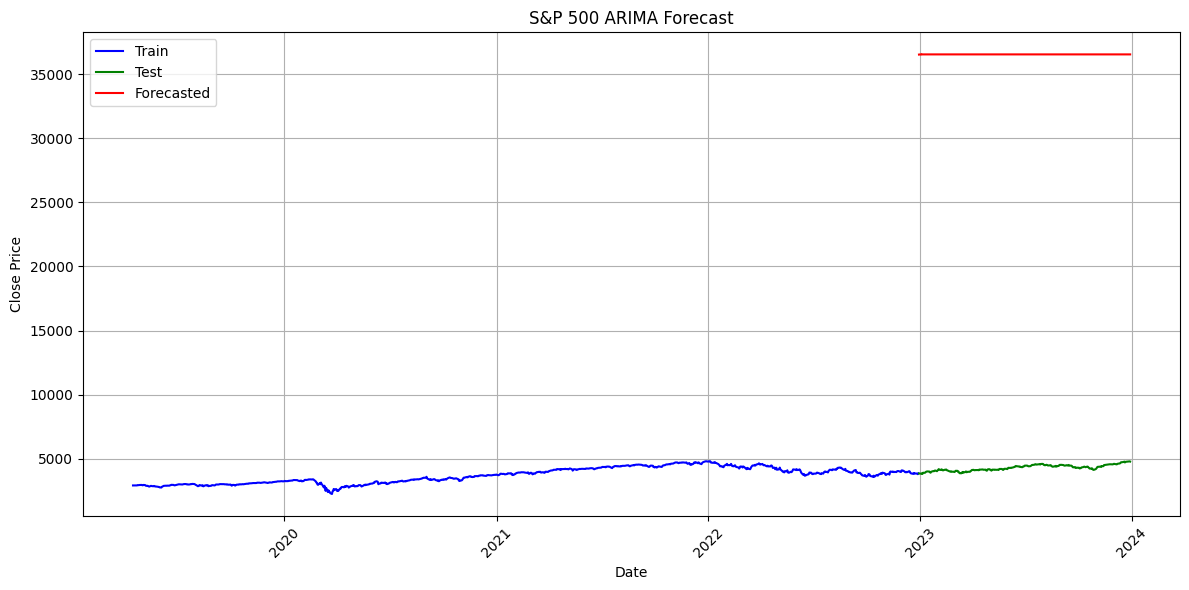

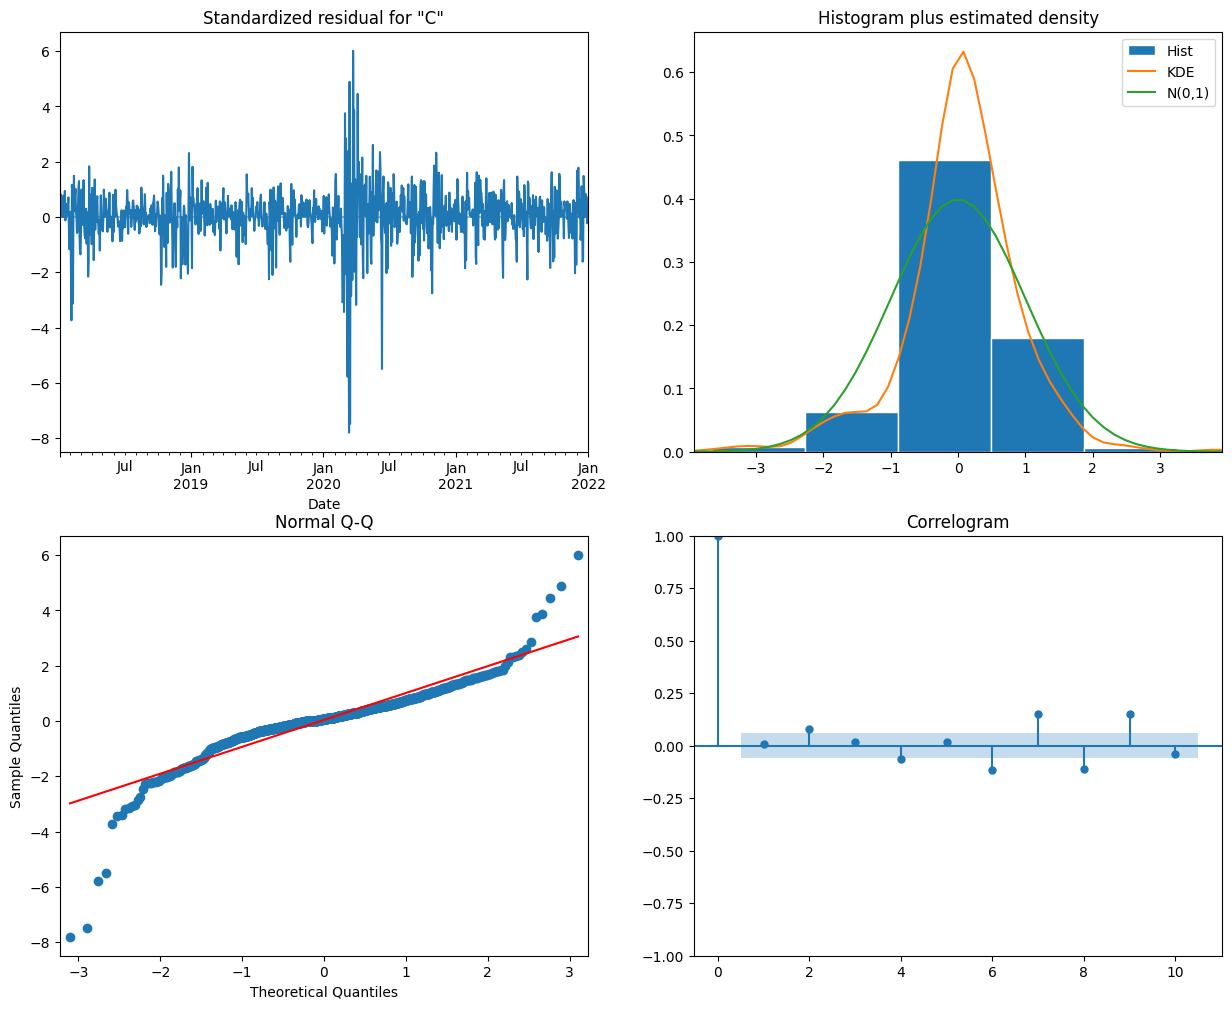

In [109]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Fit the ARIMA model
model = ARIMA(dow_jones_train_df['Close'], order=(1, 1, 1))
fitted_model = model.fit()

# Print the summary of the model
print(fitted_model.summary())

# Forecast future values
predictions = fitted_model.forecast(steps=len(sp_test_df))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sp_train_df['Close'], label='Train', color='blue')
plt.plot(sp_test_df['Close'], label='Test', color='green')
plt.plot(sp_test_df.index, predictions, label='Forecasted', color='red')

# Improve the time axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Additional plot settings
plt.title('S&P 500 ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

# Optionally, run diagnostics to check for any issues with the model
fitted_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [110]:
# Check for duplicate dates
duplicates = sp_train_df.index[sp_train_df.index.duplicated()].unique()
print("Duplicate dates:", duplicates)

# Resolve duplicates by aggregating data (mean, median, etc.) or removing them
if not duplicates.empty:
    sp_train_df = sp_train_df.groupby(sp_train_df.index).mean()  # Adjust aggregation method as needed

# Check again for duplicates after cleaning
duplicates_post_clean = sp_train_df.index[sp_train_df.index.duplicated()].unique()
print("Remaining duplicate dates after cleaning:", duplicates_post_clean)

Duplicate dates: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
Remaining duplicate dates after cleaning: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [111]:
# Set the frequency by defining a new date range and reindexing
if duplicates.empty:
    new_index = pd.date_range(start=sp_train_df.index.min(), end=sp_train_df.index.max(), freq='B')  # 'B' for business days
    sp_train_df = sp_train_df.reindex(new_index, method='ffill')  # Forward fill to handle any missing data

# Verify the frequency has been set
print("Frequency set on index:", sp_train_df.index.freq)

Frequency set on index: <BusinessDay>


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1045
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7319.307
Date:                Thu, 02 May 2024   AIC                          14644.615
Time:                        04:43:29   BIC                          14659.467
Sample:                    01-02-2018   HQIC                         14650.248
                         - 01-03-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4568      0.059     -7.765      0.000      -0.572      -0.342
ma.L1          0.2881      0.064      4.473      0.000       0.162       0.414
sigma2      1.186e+05   2154.225     55.043      0.0

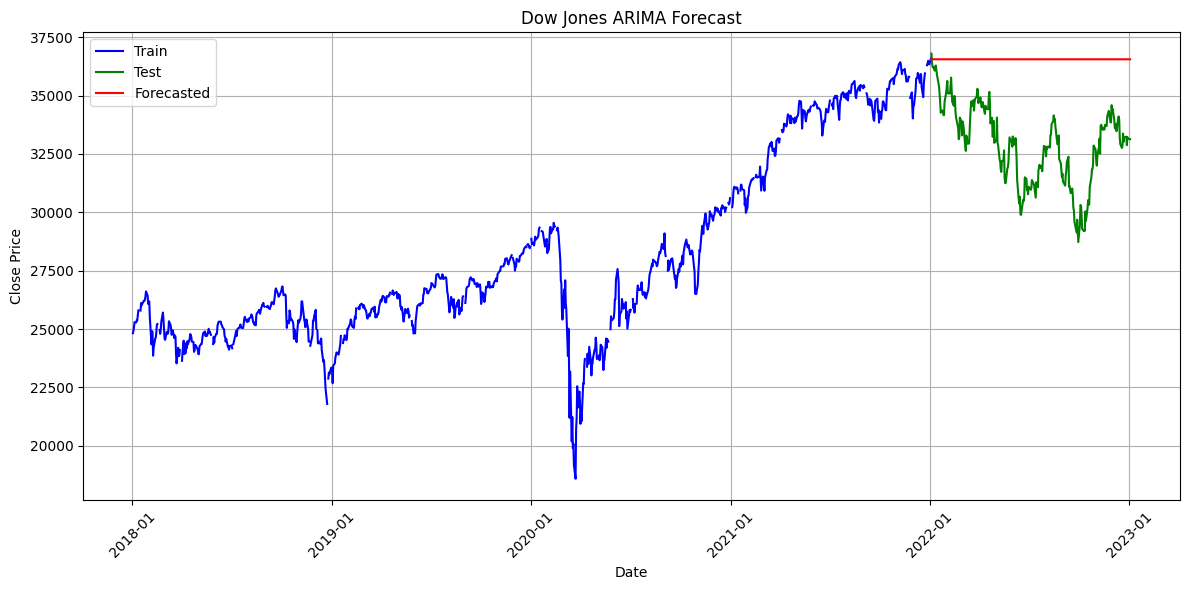

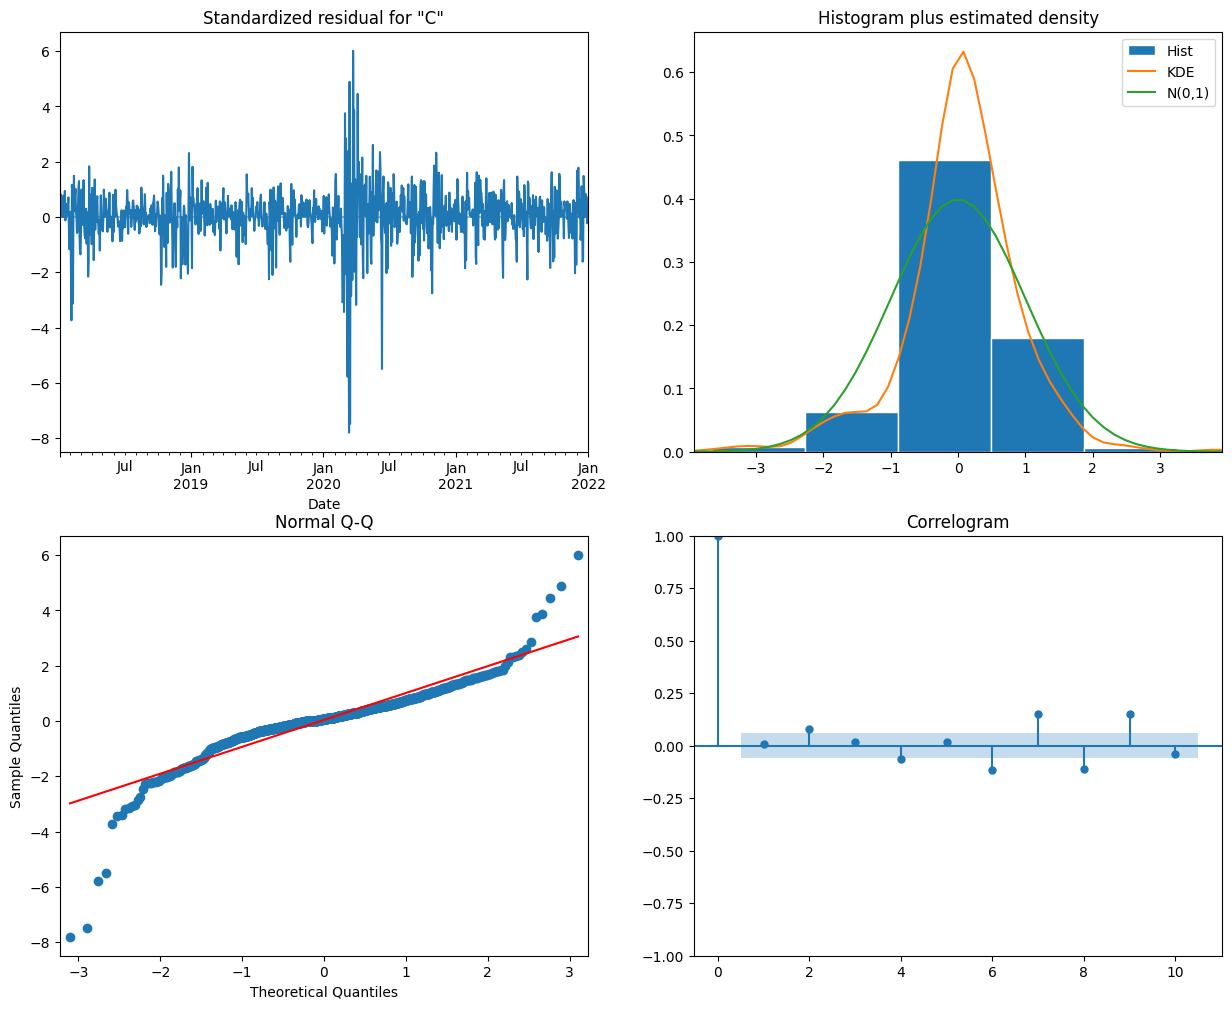

In [112]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Fit the ARIMA model
model = ARIMA(dow_jones_train_df['Close'], order=(1, 1, 1))
fitted_model = model.fit()

# Print the summary of the model
print(fitted_model.summary())

# Forecast future values
predictions = fitted_model.forecast(steps=len(dow_jones_test_df))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(dow_jones_train_df['Close'], label='Train', color='blue')
plt.plot(dow_jones_test_df['Close'], label='Test', color='green')
plt.plot(dow_jones_test_df.index, predictions, label='Forecasted', color='red')

# Improve the time axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Additional plot settings
plt.title('Dow Jones ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

# Optionally, run diagnostics to check for any issues with the model
fitted_model.plot_diagnostics(figsize=(15, 12))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  936
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6209.859
Date:                Thu, 02 May 2024   AIC                          12425.718
Time:                        04:49:29   BIC                          12440.240
Sample:                             0   HQIC                         12431.255
                                - 936                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4303      0.182     -2.367      0.018      -0.787      -0.074
ma.L1          0.3291      0.191      1.722      0.085      -0.046       0.704
sigma2      3.449e+04   1183.792     29.139      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


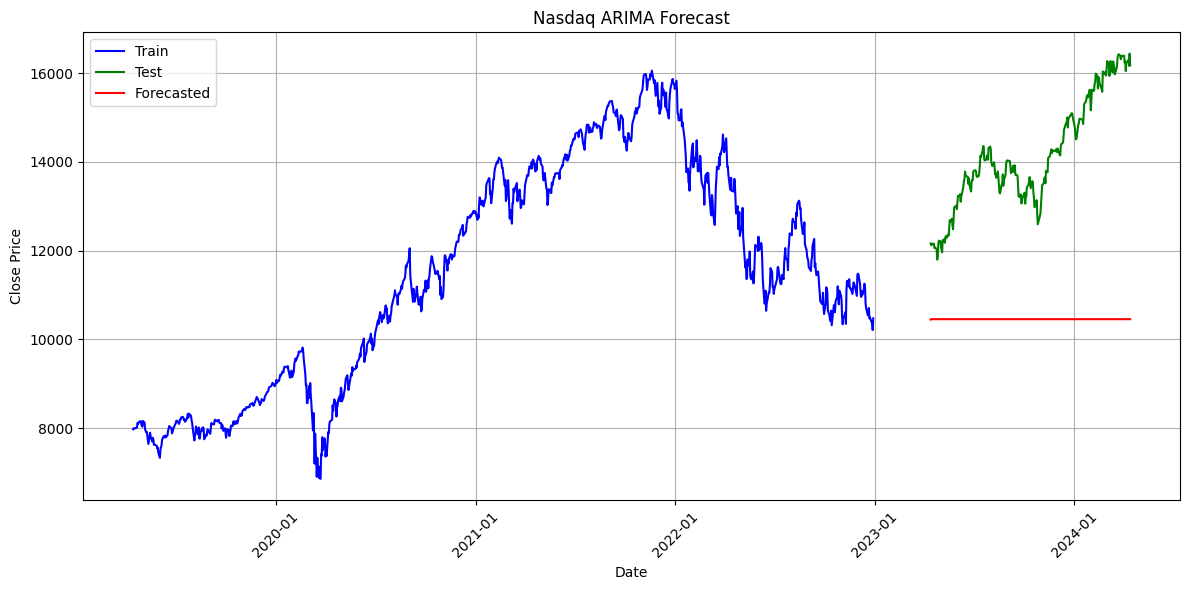

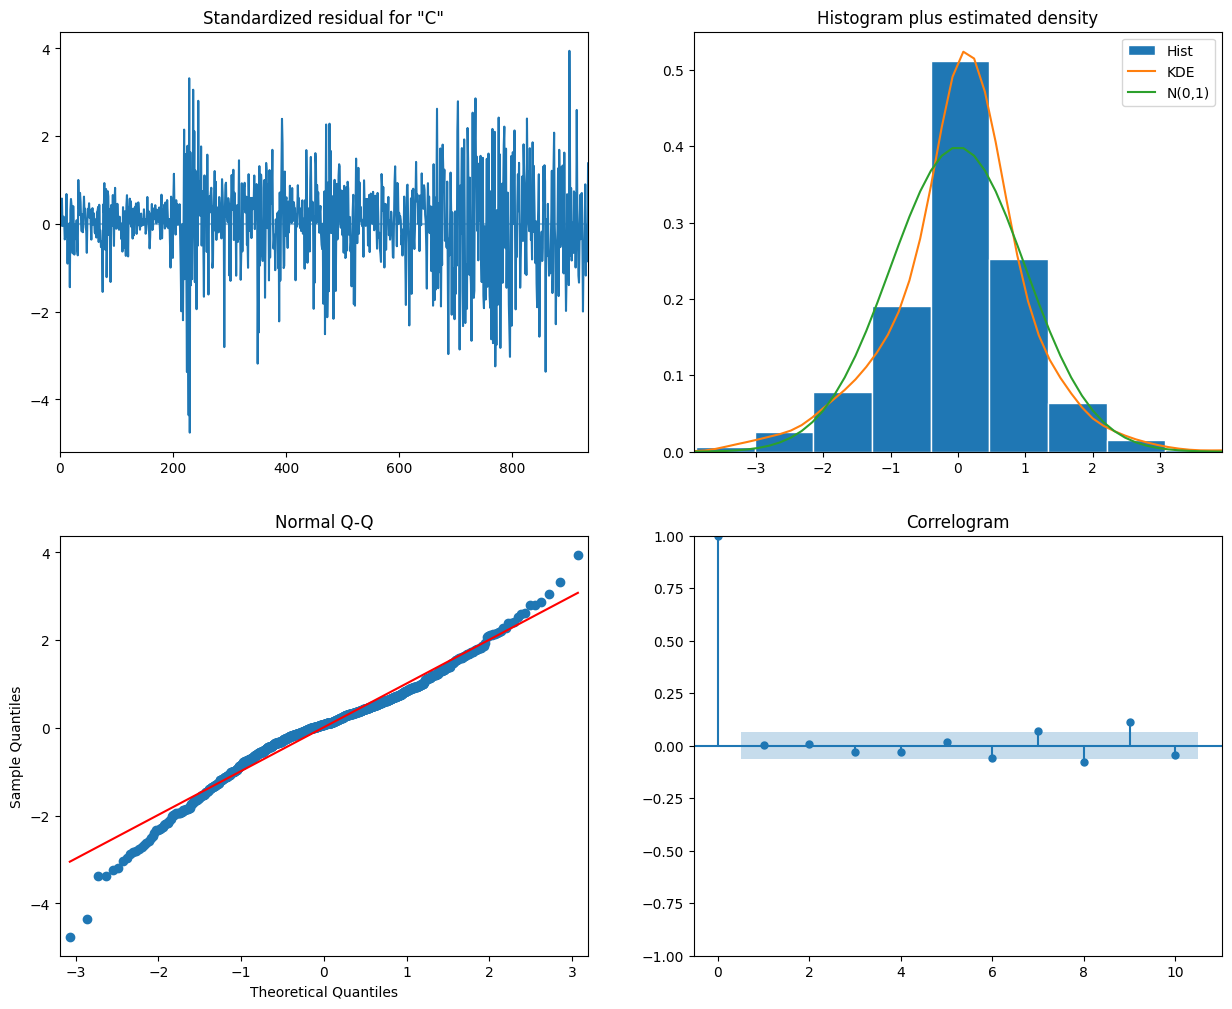

In [130]:
# Assuming 'Close/Last' is the correct column name based on Step 1
correct_column_name = 'Close'  # Replace 'Close/Last' with the actual column name

# Fit the ARIMA model
model = ARIMA(nasdaq_train_df['Close'], order=(1, 1, 1))
fitted_model = model.fit()

# Print the summary of the model
print(fitted_model.summary())

# Forecast future values
predictions = fitted_model.forecast(steps=len(nasdaq_test_df))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_train_df['Close'], label='Train', color='blue')
plt.plot(nasdaq_test_df['Close'], label='Test', color='green')
plt.plot(nasdaq_test_df.index, predictions, label='Forecasted', color='red')

# Improve the time axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Additional plot settings
plt.title('Nasdaq ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

# Optionally, run diagnostics to check for any issues with the model
fitted_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Feature Scaling
scaler = StandardScaler()
train_scaled = scaler.fit_transform(sp_train_df[['Close']])
test_scaled = scaler.transform(sp_test_df[['Close']])

# Since MLPRegressor requires 2D array for y, we'll keep y in 2D form (already done by the above scaling)
X_train = train_scaled[:-1]
y_train = train_scaled[1:]
X_test = test_scaled[:-1]
y_test = test_scaled[1:]

# Define the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=1)

# Train the model
mlp_model.fit(X_train, y_train.ravel())  # Flatten y_train to fit


MLPRegressor(max_iter=500, random_state=1)

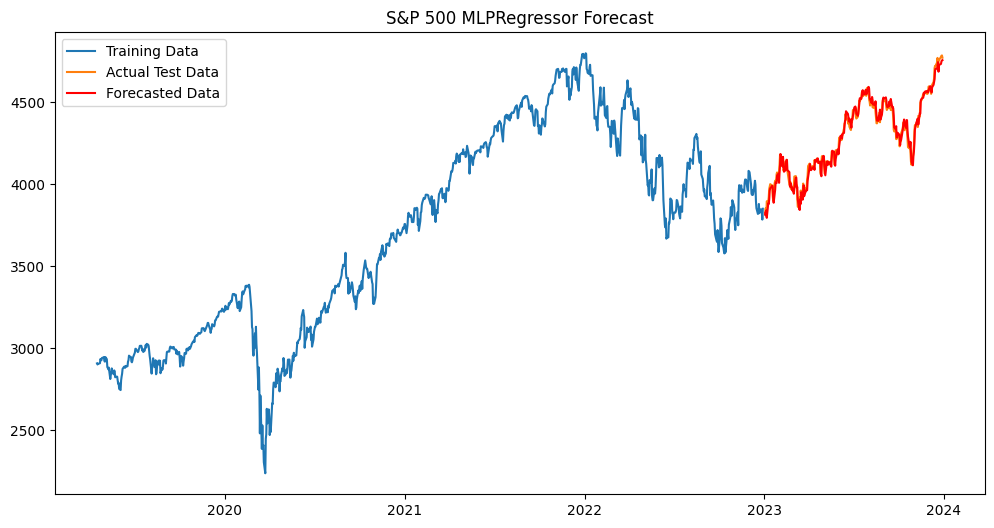

In [132]:
# Making predictions on the test data
y_pred_scaled = mlp_model.predict(X_test)

# Inverse transform to original scale for comparison
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(sp_train_df.index[-len(y_train):], scaler.inverse_transform(y_train), label='Training Data')
plt.plot(sp_test_df.index[1:], sp_test_df['Close'].iloc[1:], label='Actual Test Data')
plt.plot(sp_test_df.index[1:], y_pred, label='Forecasted Data', color='red')
plt.title('S&P 500 MLPRegressor Forecast')
plt.legend()
plt.show()

In [133]:
# Re-checking the initialization and ensuring proper handling for predictions for April 15-19, 2024
import numpy as np
# Reinitializing the input with the last known value from the actual test dataset
initial_input = test_scaled[-1].reshape(1, -1)  # Last known scaled value

# Initialize date range for April 15-19, 2024
future_dates_april = pd.date_range(start='2024-04-15', periods=5, freq='B')

# Generate predictions incrementally
incremental_predictions = []
current_input = initial_input
for _ in range(5):
    next_pred = mlp_model.predict(current_input)
    incremental_predictions.append(next_pred)
    current_input = np.array([next_pred])  # Update input with the predicted output

# Inverse transform the predictions to original scale
incremental_predictions_scaled = scaler.inverse_transform(incremental_predictions)

# Assign predictions to the correct dates
mlp_future_predictions = pd.Series(incremental_predictions_scaled.ravel(), index=future_dates_april)
mlp_future_predictions


2024-04-15    4743.764762
2024-04-16    4722.707468
2024-04-17    4705.090534
2024-04-18    4690.164677
2024-04-19    4677.509515
Freq: B, dtype: float64

In [134]:
from sklearn.impute import SimpleImputer

# Create an imputer object for a 'forward fill' strategy
imputer = SimpleImputer(strategy='constant', fill_value=0)  # Using zero can be replaced with 'mean' or 'median' if more appropriate

# Impute missing values in X_train and y_train
X_train = imputer.fit_transform(X_train)
y_train = imputer.transform(y_train.reshape(-1, 1)).ravel()  # Ensure y_train is reshaped correctly if it's not already 1D

In [135]:
from sklearn.neural_network import MLPRegressor

# Reinitialize the MLPRegressor (optional if you're using the same instance)
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=1)

# Train the model
mlp_model.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

In [136]:
import numpy as np
from sklearn.impute import SimpleImputer

# Check for NaNs in X_train and y_train
print("NaNs in X_train before imputation:", np.isnan(X_train).sum())
print("NaNs in y_train before imputation:", np.isnan(y_train).sum())

# Impute NaNs using SimpleImputer for both X_train and y_train
imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'median' or 'most_frequent' if more appropriate

X_train = imputer.fit_transform(X_train)  # Fit and transform X_train to fill NaNs
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()  # Ensure y_train is reshaped correctly and fill NaNs

# Check again to ensure no NaNs remain
print("NaNs in X_train after imputation:", np.isnan(X_train).sum())
print("NaNs in y_train after imputation:", np.isnan(y_train).sum())

NaNs in X_train before imputation: 0
NaNs in y_train before imputation: 0
NaNs in X_train after imputation: 0
NaNs in y_train after imputation: 0


In [137]:
from sklearn.neural_network import MLPRegressor

# Reinitialize and fit the MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=1)

try:
    mlp_model.fit(X_train, y_train)
    print("Model trained successfully!")
except ValueError as e:
    print("Failed to train the model due to:", e)

Model trained successfully!


Mean Squared Error: 0.0037301501571198534


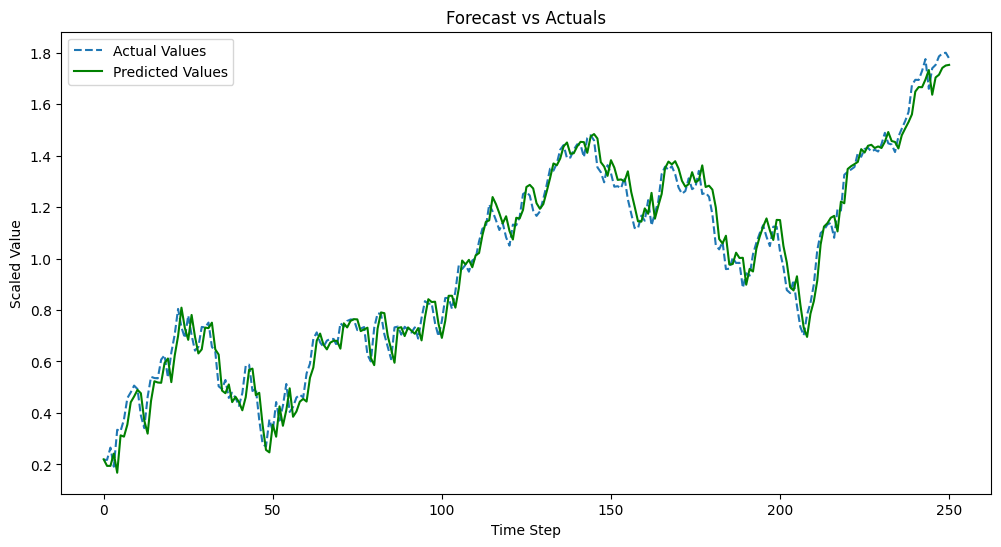

In [138]:
# Predict on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model using mean squared error or any other metric
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualization of the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='--')
plt.plot(y_pred, label='Predicted Values', color='green')
plt.title('Forecast vs Actuals')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

In [139]:
# Re-checking the initialization and ensuring proper handling for predictions for April 15-19, 2024
import numpy as np
# Reinitializing the input with the last known value from the actual test dataset
initial_input = test_scaled[-1].reshape(1, -1)  # Last known scaled value

# Initialize date range for April 15-19, 2024
future_dates_april = pd.date_range(start='2024-04-15', periods=5, freq='B')

# Generate predictions incrementally
incremental_predictions = []
current_input = initial_input
for _ in range(5):
    next_pred = mlp_model.predict(current_input)
    incremental_predictions.append(next_pred)
    current_input = np.array([next_pred])  # Update input with the predicted output

# Inverse transform the predictions to original scale
incremental_predictions_scaled = scaler.inverse_transform(incremental_predictions)

# Assign predictions to the correct dates
mlp_future_predictions = pd.Series(incremental_predictions_scaled.ravel(), index=future_dates_april)
mlp_future_predictions


2024-04-15    4743.764762
2024-04-16    4722.707468
2024-04-17    4705.090534
2024-04-18    4690.164677
2024-04-19    4677.509515
Freq: B, dtype: float64

In [140]:
# Feature Scaling
scaler = StandardScaler()
train_scaled = scaler.fit_transform(nasdaq_train_df[['Close']])
test_scaled = scaler.transform(nasdaq_test_df[['Close']])

# Since MLPRegressor requires 2D array for y, we'll keep y in 2D form (already done by the above scaling)
X_train = train_scaled[:-1]
y_train = train_scaled[1:]
X_test = test_scaled[:-1]
y_test = test_scaled[1:]

# Define the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=1)

# Train the model
mlp_model.fit(X_train, y_train.ravel())  # Flatten y_train to fit

MLPRegressor(max_iter=500, random_state=1)

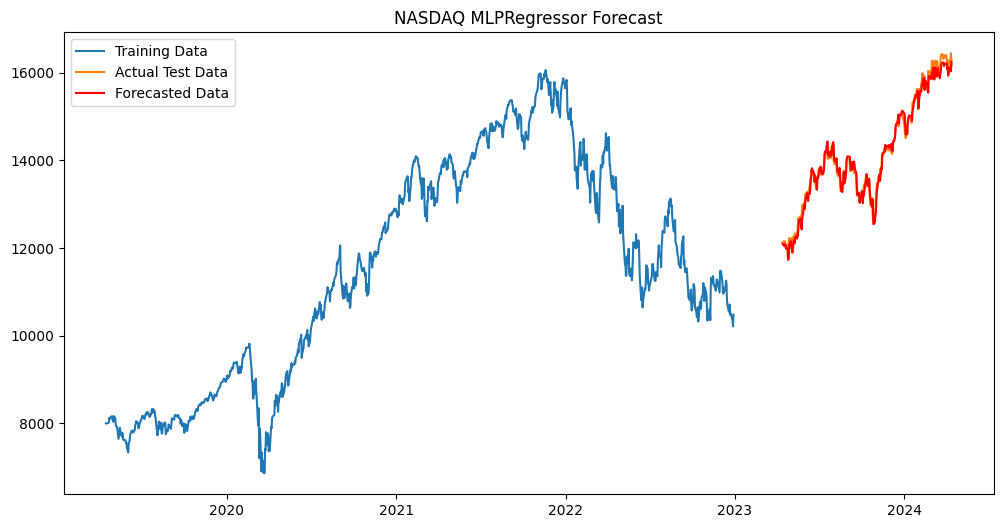

In [141]:
# Making predictions on the test data
y_pred_scaled = mlp_model.predict(X_test)

# Inverse transform to original scale for comparison
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_train_df.index[-len(y_train):], scaler.inverse_transform(y_train), label='Training Data')
plt.plot(nasdaq_test_df.index[1:], nasdaq_test_df['Close'].iloc[1:], label='Actual Test Data')
plt.plot(nasdaq_test_df.index[1:], y_pred, label='Forecasted Data', color='red')
plt.title('NASDAQ MLPRegressor Forecast')
plt.legend()
plt.show()

In [142]:
# Re-checking the initialization and ensuring proper handling for predictions for April 15-19, 2024
import numpy as np
# Reinitializing the input with the last known value from the actual test dataset
initial_input = test_scaled[-1].reshape(1, -1)  # Last known scaled value

# Initialize date range for April 15-19, 2024
future_dates_april = pd.date_range(start='2024-04-15', periods=5, freq='B')

# Generate predictions incrementally
incremental_predictions = []
current_input = initial_input
for _ in range(5):
    next_pred = mlp_model.predict(current_input)
    incremental_predictions.append(next_pred)
    current_input = np.array([next_pred])  # Update input with the predicted output

# Inverse transform the predictions to original scale
incremental_predictions_scaled = scaler.inverse_transform(incremental_predictions)

# Assign predictions to the correct dates
mlp_future_predictions = pd.Series(incremental_predictions_scaled.ravel(), index=future_dates_april)
mlp_future_predictions


2024-04-15    16034.927237
2024-04-16    15920.944672
2024-04-17    15828.252257
2024-04-18    15752.873327
2024-04-19    15689.599328
Freq: B, dtype: float64